### Implementing K-Means Clustering from Scratch Without SKlearn: Loan Prediction

Two pretty important things in any data science project.

First, import all the required libraries:

In [2]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Next, we load our dataset

In [3]:
data = pd.read_csv('clustering dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


We will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome”. This will make it easy to visualize. Let’s pick these two variables and visualize the data points:

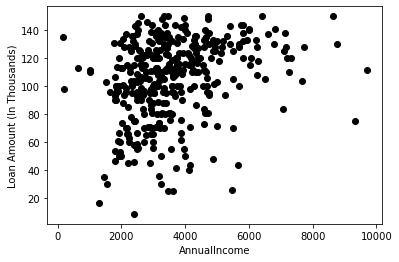

In [6]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:

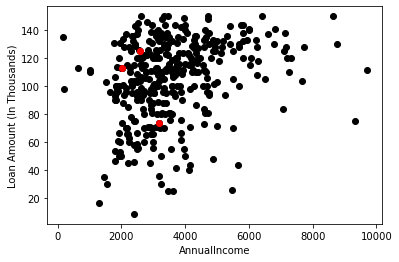

In [7]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Here, the red dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly and hence every time you run this code, you might get different centroids.

Next, we will define some conditions to implement the K-Means Clustering algorithm. Let’s first look at the code:

In [8]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\user\AppData\Local\Temp/ipykernel_8280/3142618123.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\user\AppData\Local\Temp/ipykernel_8280/3142618123.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


621.9019590583393
607.4517278381379
594.7898739733771
410.33840222073997
390.07169618746116
198.26496703908293
209.43905234169634
255.37125148586168
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


These values might vary every time we run this. Here, we are stopping the training when the centroids are not changing after two iterations. We have initially defined the diff as 1 and inside the while loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

When this difference is 0, we are stopping the training. Let’s now visualize the clusters we have got:

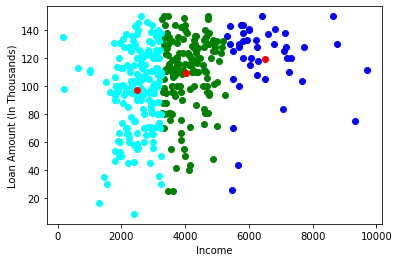

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Awesome! Here, we can clearly visualize three clusters. The red dots represent the centroid of each cluster. I hope you now have a clear understanding of how K-Means work.

### Challenges with the K-Means Clustering Algorithm

There are certain situations where this algorithm might not perform as well. Let’s look at some challenges which you can face while working with k-means.

One of the common challenges we face while working with K-Means is that the size of clusters is different. Let’s say we have the below points:



The left and the rightmost clusters are of smaller size compared to the central cluster. Now, if we apply k-means clustering on these points, the results will be something like this:

We can see that the compact points have been assigned to a single cluster. Whereas the points that are spread loosely but were in the same cluster, have been assigned to different clusters. Not ideal so what can we do about this? One solution would be to use a higher number of o k 

Remember how we randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

 

### Implementing K-Means Clustering in Python WITH SKLearn

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. So, let’s start coding!

We will first import the required libraries:

In [10]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Next, let’s read the data and look at the first five rows:

In [12]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We have the spending details of customers on different products like Milk, Grocery, Frozen, Detergents, etc. Now, we have to segment the customers based on the provided details. Before doing that, let’s pull out some statistics related to the data:



In [14]:
# statistics of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:



In [15]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [16]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results as we have discussed in the previous section as well.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [17]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123056

We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in ve

Text(0, 0.5, 'Inertia')

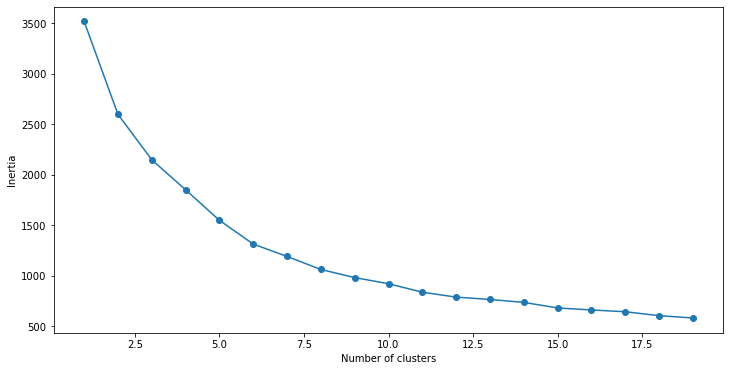

In [18]:

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [19]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Finally, let’s look at the value count of points in each of the above-formed clusters:



In [23]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()


1    209
0    126
4     92
3     12
2      1
Name: cluster, dtype: int64

So, there are 234 data points belonging to cluster 4 (index 3), then 125 points in cluster 2 (index 1), and so on. This is how we can implement K-Means Clustering in Python.

 